## CNN Model and Nearest Neighbors


### Importing Libraries

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.preprocessing import image
from tensorflow.keras.applications import ResNet101V2
import numpy as np
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import os

2024-12-07 15:13:11.567733: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-12-07 15:13:11.575135: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-12-07 15:13:11.583567: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-12-07 15:13:11.586031: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-07 15:13:11.592014: I tensorflow/core/platform/cpu_feature_guar

### Splitting Dataset

In [2]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   validation_split=0.2)

training_set = train_datagen.flow_from_directory('dataset',
                                                 target_size=(224, 224),
                                                 batch_size=32,
                                                 class_mode='categorical',
                                                 subset='training')

validation_set = train_datagen.flow_from_directory('dataset',
                                                   target_size=(224, 224),
                                                   batch_size=32,
                                                   class_mode='categorical',
                                                   subset='validation')

Found 2416 images belonging to 10 classes.
Found 599 images belonging to 10 classes.


### Training Model

In [3]:
base_model = Sequential([
        Conv2D(96, (7, 7), strides=(2, 2), activation='relu', input_shape=(224, 224, 3)),
        MaxPooling2D(pool_size=(3, 3), strides=(2, 2)),

        Conv2D(256, (5, 5), activation='relu'),
        MaxPooling2D(pool_size=(3, 3), strides=(2, 2)),

        Conv2D(384, (3, 3), activation='relu'),
        
        Conv2D(384, (3, 3), activation='relu'),

        Conv2D(256, (3, 3), activation='relu'),
        MaxPooling2D(pool_size=(3, 3), strides=(2, 2)),

        Flatten(),

        Dense(4096, activation='relu'),
        Dropout(0.5),
    ])

new_classifier = Sequential([
    Dense(4096, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

cnn_model = Sequential([
    base_model,
    new_classifier
])

cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = cnn_model.fit(training_set, validation_data=validation_set, epochs=10)

/home/bzmysr/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1733562793.062809    1044 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1733562793.079091    1044 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1733562793.079129    1044 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1733562793.081924    1044 cuda_execut

Epoch 1/10


I0000 00:00:1733562810.453407  116339 service.cc:146] XLA service 0x7f61b8007d20 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1733562810.453434  116339 service.cc:154]   StreamExecutor device (0): NVIDIA GeForce RTX 4070 Laptop GPU, Compute Capability 8.9
2024-12-07 15:13:30.485333: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-12-07 15:13:30.643726: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 8907


 2/76 ━━━━━━━━━━━━━━━━━━━━ 4s 63ms/step - accuracy: 0.1172 - loss: 6.0283  

I0000 00:00:1733562818.637406  116339 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step - accuracy: 0.2539 - loss: 2.9134

2024-12-07 15:13:53.463585: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_116', 16 bytes spill stores, 16 bytes spill loads

2024-12-07 15:13:53.675305: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_116', 132 bytes spill stores, 132 bytes spill loads

2024-12-07 15:13:53.711700: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_123', 188 bytes spill stores, 188 bytes spill loads

2024-12-07 15:13:58.727491: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_116', 88 bytes spill stores, 88 bytes spill loads

2024-12-07 15:13:58.954445: I external/local_xla/xla/stream_

76/76 ━━━━━━━━━━━━━━━━━━━━ 34s 296ms/step - accuracy: 0.2543 - loss: 2.9047 - val_accuracy: 0.4023 - val_loss: 1.9256
Epoch 2/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 14s 189ms/step - accuracy: 0.4413 - loss: 1.7639 - val_accuracy: 0.4841 - val_loss: 1.4751
Epoch 3/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 12s 156ms/step - accuracy: 0.6069 - loss: 1.2685 - val_accuracy: 0.6294 - val_loss: 1.1801
Epoch 4/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 14s 181ms/step - accuracy: 0.7219 - loss: 0.8814 - val_accuracy: 0.7212 - val_loss: 0.8455
Epoch 5/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 12s 155ms/step - accuracy: 0.7980 - loss: 0.6740 - val_accuracy: 0.7379 - val_loss: 0.9395
Epoch 6/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 12s 161ms/step - accuracy: 0.8183 - loss: 0.5947 - val_accuracy: 0.7396 - val_loss: 1.0539
Epoch 7/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 13s 175ms/step - accuracy: 0.8452 - loss: 0.5281 - val_accuracy: 0.7880 - val_loss: 0.7643
Epoch 8/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 12s 156ms/step - accuracy: 0.8354 - loss: 0.5375 - val_accuracy: 0.724

### Extracting Image Features

In [4]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

def extract_features_fixed(image_path, base_model):
    img = load_img(image_path, target_size=(224, 224))
    img_array = img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    features = base_model.predict(img_array)
    return features.flatten()

def create_feature_list(dataset_dir, base_model):
    features_list = []
    image_paths = []
    
    for subdir, dirs, files in os.walk(dataset_dir):
        for file in files:
            if file.endswith(('jpg', 'jpeg', 'png')):
                file_path = os.path.join(subdir, file)
                features = extract_features_fixed(file_path, base_model)
                features_list.append(features)
                image_paths.append(file_path)
    
    return np.array(features_list), image_paths

features_list, image_paths = create_feature_list("dataset", base_model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 667ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━

### Finding Nearest Neighbors

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Nearest images to dataset/airplanes/image_0026.jpg:
dataset/airplanes/image_0026.jpg - Distance: 0.0000
dataset/airplanes/image_0027.jpg - Distance: 0.0547
dataset/grand_piano/image_0050.jpg - Distance: 0.1526
dataset/grand_piano/image_0055.jpg - Distance: 0.1883
dataset/grand_piano/image_0079.jpg - Distance: 0.1888
dataset/grand_piano/image_0082.jpg - Distance: 0.1960
dataset/watch/image_0221.jpg - Distance: 0.1961
dataset/airplanes/image_0238.jpg - Distance: 0.1974
dataset/airplanes/image_0197.jpg - Distance: 0.2042
dataset/airplanes/image_0131.jpg - Distance: 0.2071


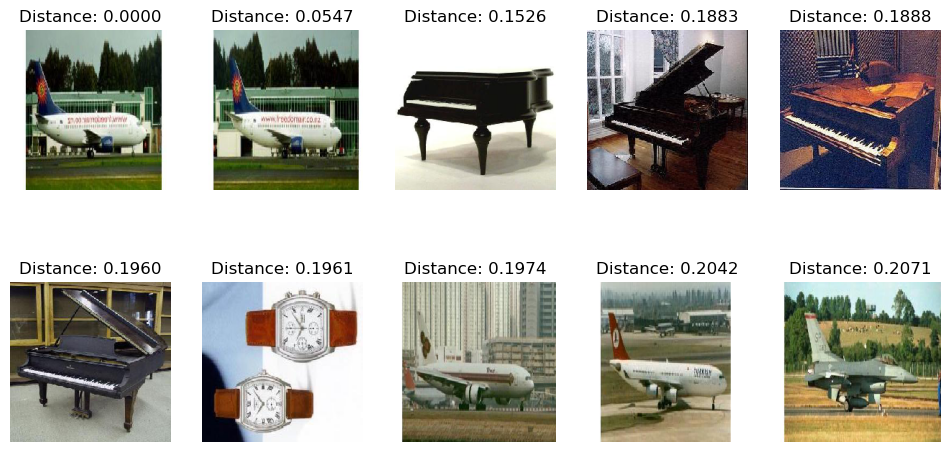

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Nearest images to photos/plane.jpg:
dataset/airplanes/image_0225.jpg - Distance: 0.0724
dataset/airplanes/image_0799.jpg - Distance: 0.0817
dataset/airplanes/image_0576.jpg - Distance: 0.0841
dataset/airplanes/image_0604.jpg - Distance: 0.0854
dataset/airplanes/image_0631.jpg - Distance: 0.0879
dataset/airplanes/image_0605.jpg - Distance: 0.0905
dataset/airplanes/image_0233.jpg - Distance: 0.0914
dataset/airplanes/image_0384.jpg - Distance: 0.0915
dataset/airplanes/image_0688.jpg - Distance: 0.0925
dataset/airplanes/image_0800.jpg - Distance: 0.0929


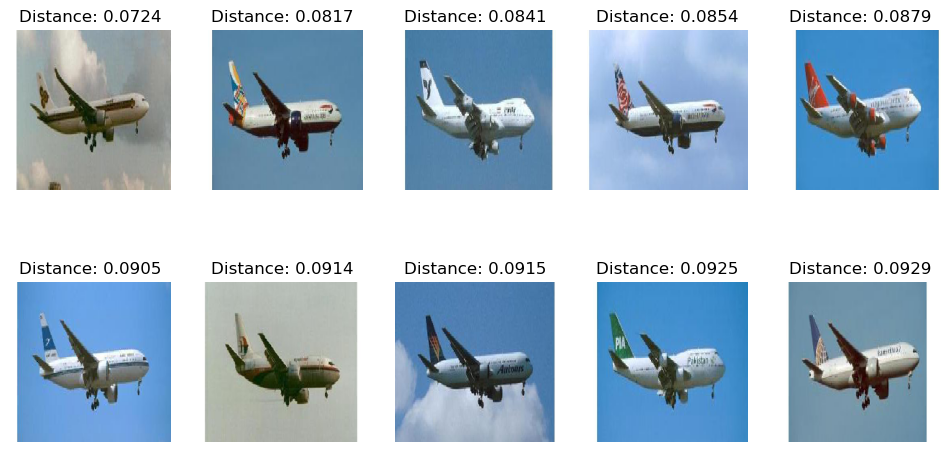

In [8]:
def find_nearest_images(image_path, base_model, n_neighbors=10):
    image_features = extract_features_fixed(image_path, base_model)
    
    neighbors = NearestNeighbors(n_neighbors=n_neighbors, metric='cosine')
    neighbors.fit(features_list)
    
    distances, indices = neighbors.kneighbors([image_features])
    
    print(f"Nearest images to {image_path}:")
    for i in range(n_neighbors):
        print(f"{image_paths[indices[0][i]]} - Distance: {distances[0][i]:.4f}")
    
    plt.figure(figsize=(12, 6))
    for i in range(n_neighbors):
        img = load_img(image_paths[indices[0][i]], target_size=(224, 224))
        plt.subplot(2, 5, i+1)
        plt.imshow(img)
        plt.axis('off')
        plt.title(f"Distance: {distances[0][i]:.4f}")
    plt.show()

find_nearest_images('dataset/airplanes/image_0026.jpg', base_model, n_neighbors=10)
find_nearest_images('photos/plane.jpg', base_model, n_neighbors=10)